In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy
import sklearn
sns.set()

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Clients

<function matplotlib.pyplot.show(close=None, block=None)>

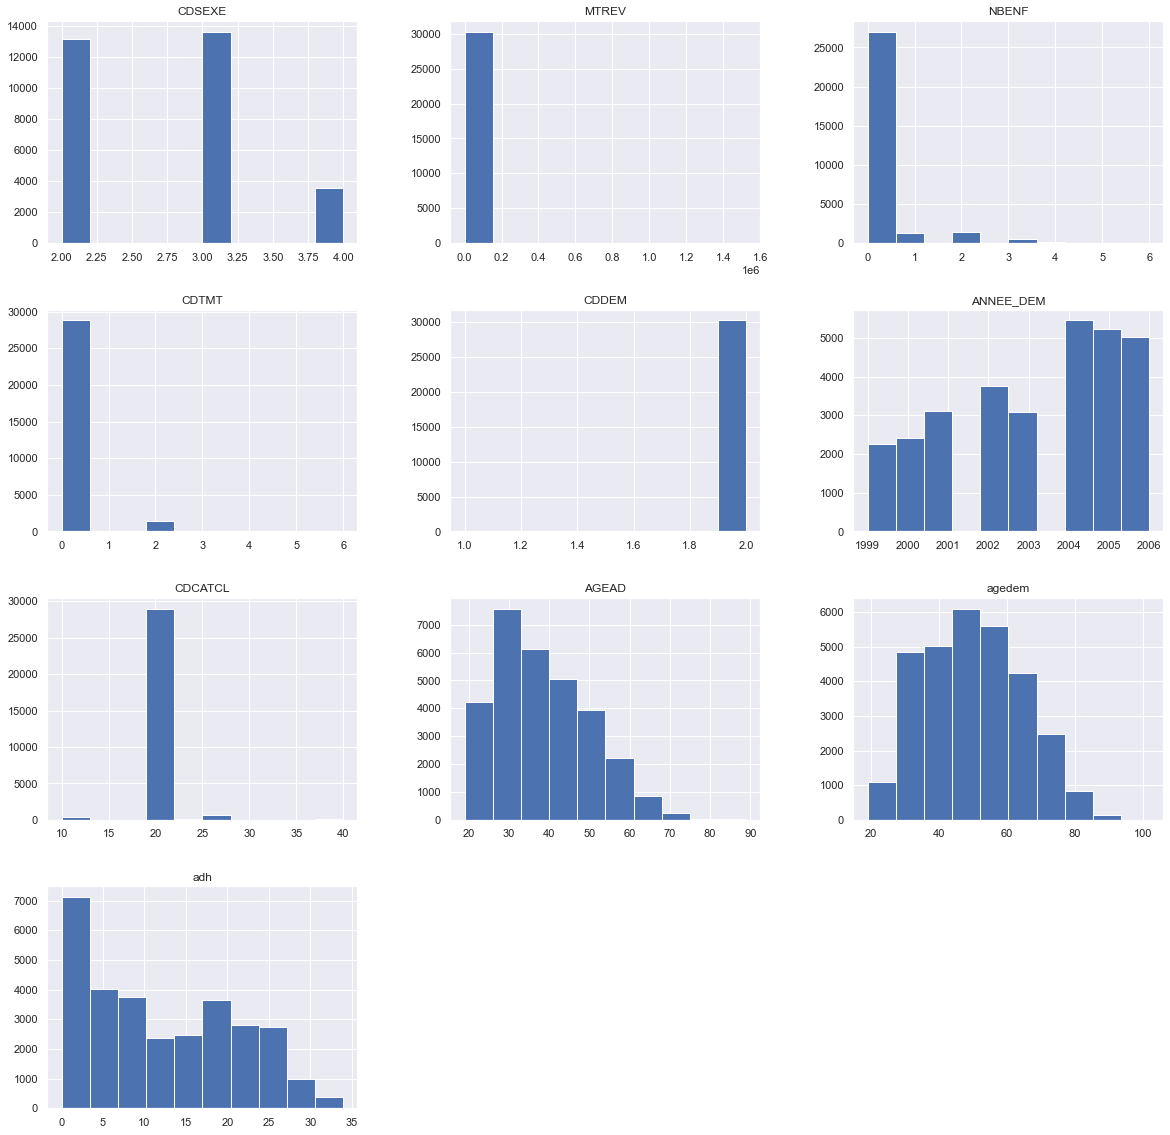

In [58]:
tbl_df = pd.read_csv('../samples/data/data_mining_DB_clients_tbl.csv')
tbl_df = tbl_df.drop(['Id'], axis=1)

tbl_df.hist(figsize=(20,20))
plt.show

<AxesSubplot:>

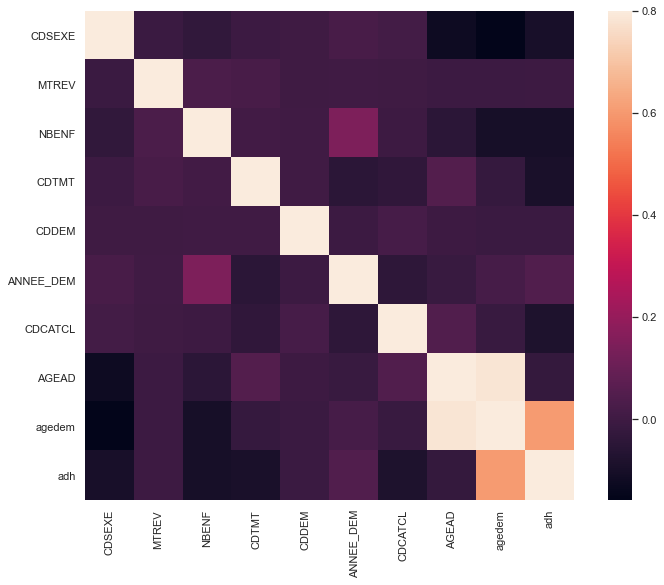

In [59]:
corrmatrix = tbl_df.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmatrix, vmax =0.8, square = True)

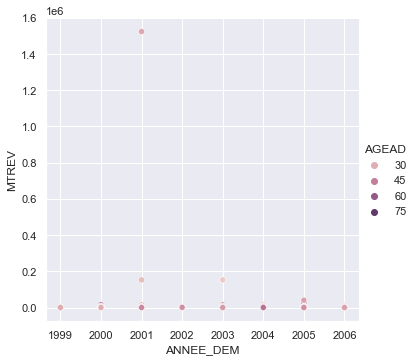

In [60]:
sns.relplot(x='ANNEE_DEM', y ='MTREV', hue ='AGEAD', data = tbl_df)

## Clients BIS

<function matplotlib.pyplot.show(close=None, block=None)>

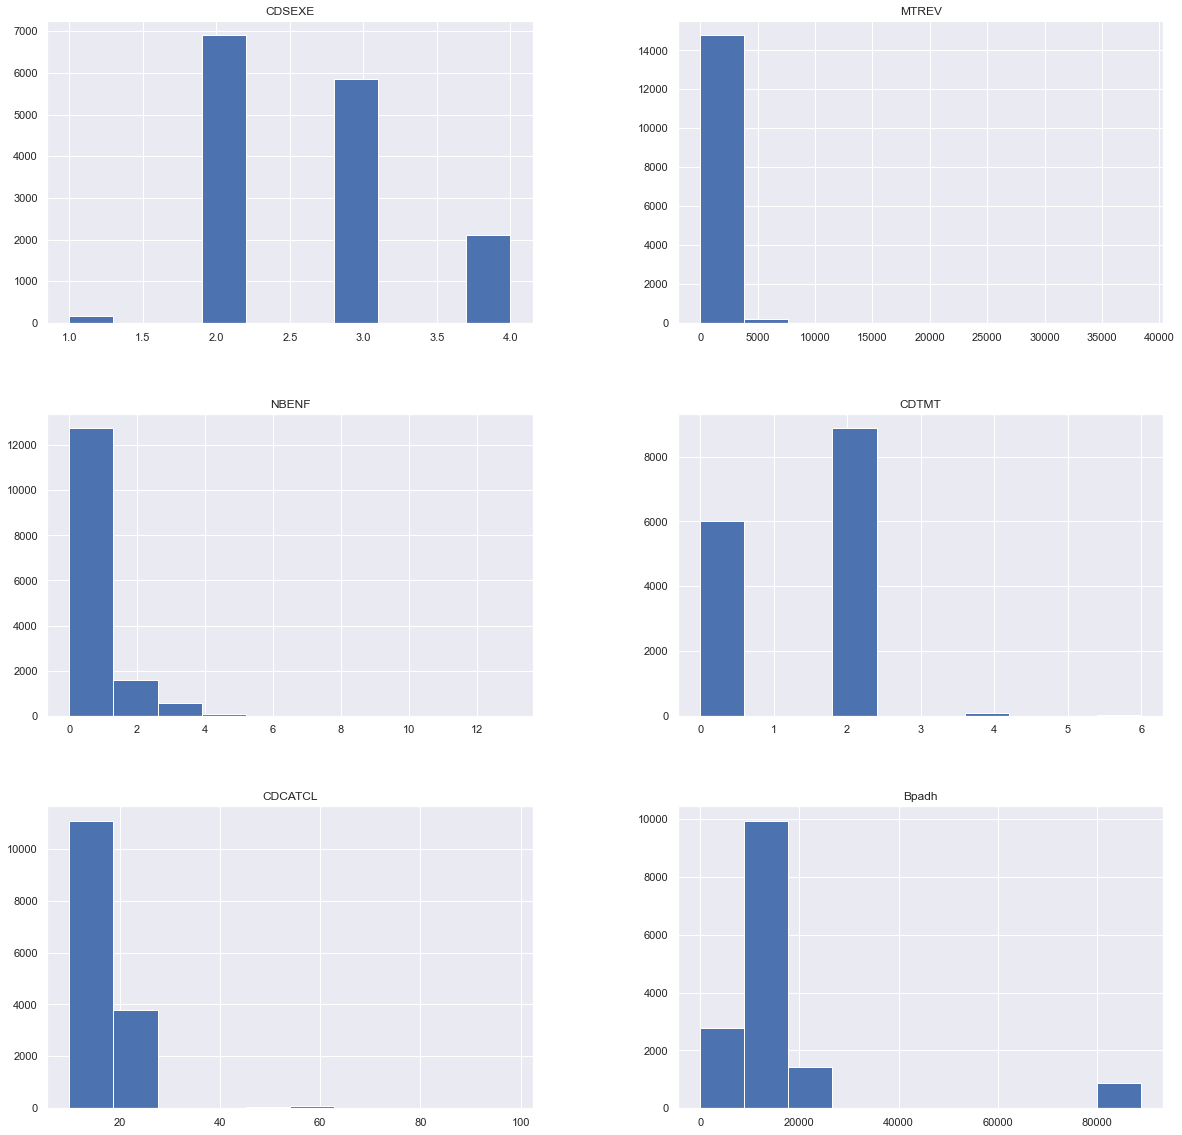

In [61]:
bis_df = pd.read_csv('../samples/data/data_mining_DB_clients_tbl_bis.csv')
bis_df = bis_df.drop(['Id'], axis=1)

bis_df.hist(figsize=(20,20))
plt.show

<AxesSubplot:>

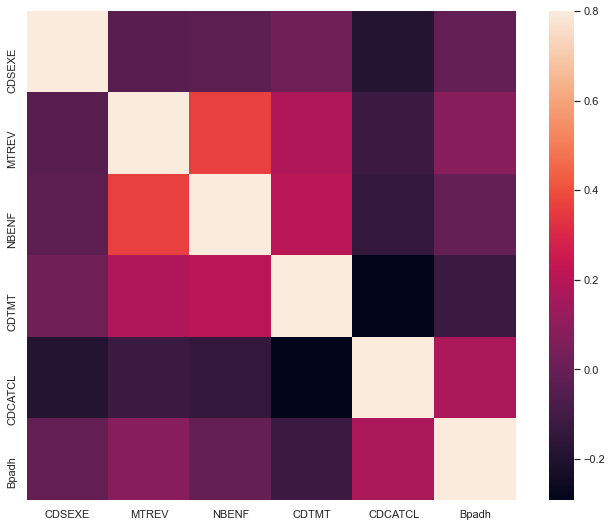

In [62]:
corrmatrix = bis_df.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmatrix, vmax =0.8, square = True)

## Resultat

<function matplotlib.pyplot.show(close=None, block=None)>

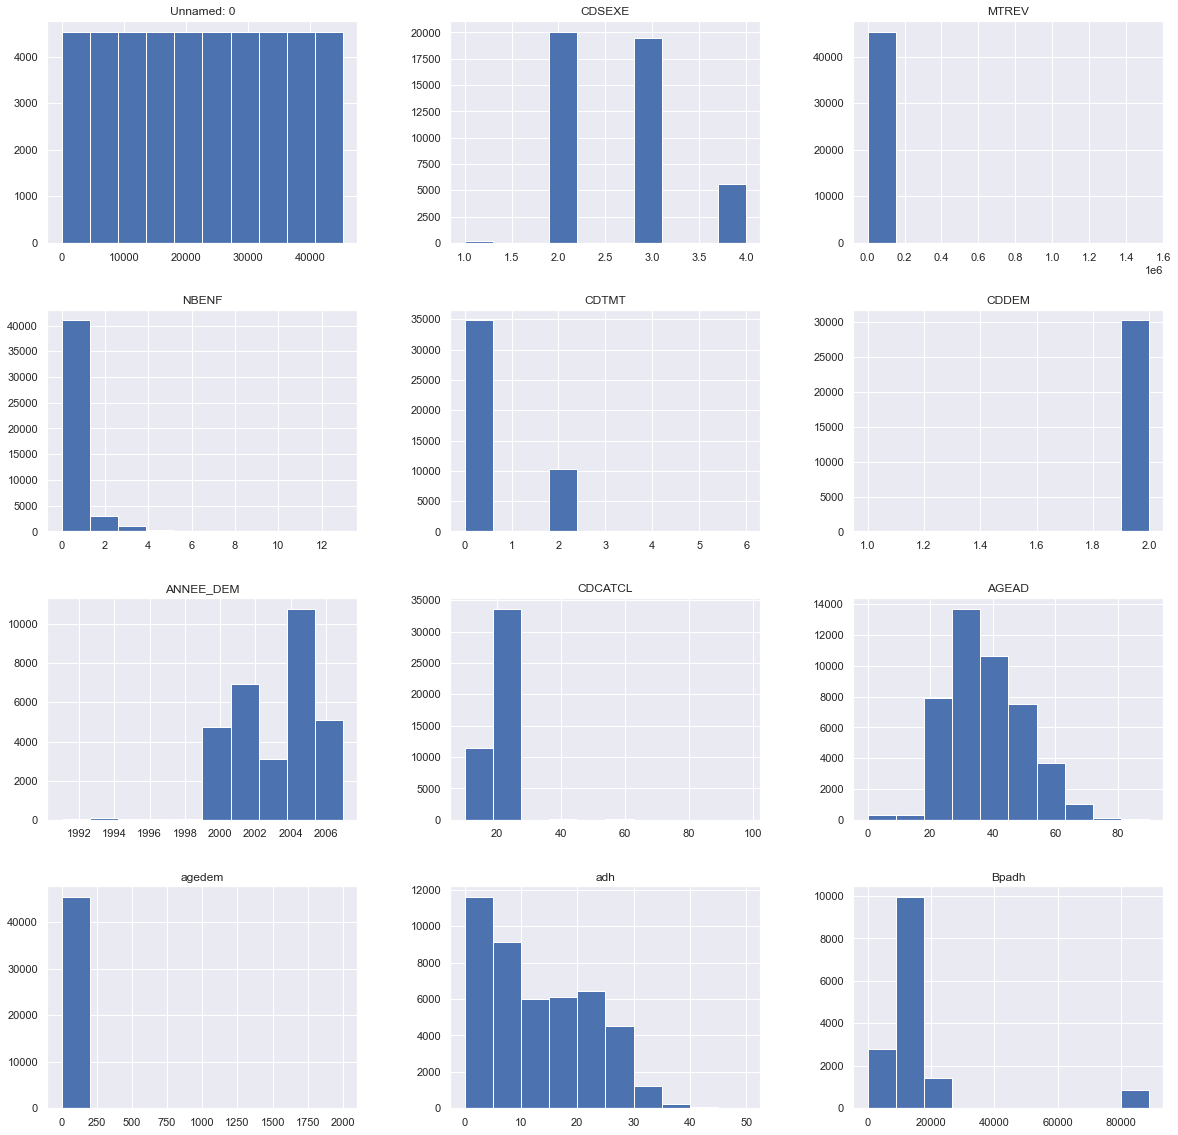

In [63]:
res_df = pd.read_csv('result.csv')
res_df = res_df.drop(['Id'], axis=1)

res_df.hist(figsize=(20,20))
plt.show

<AxesSubplot:>

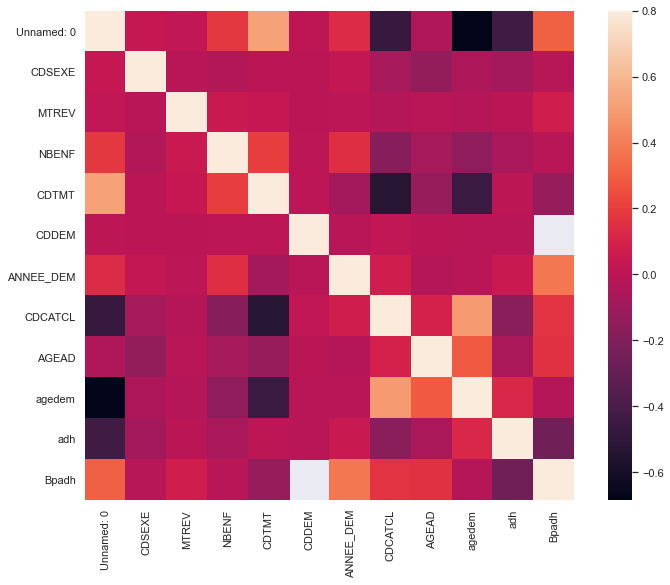

In [64]:
corrmatrix = res_df.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmatrix, vmax =0.8, square = True)


## Prev

In [65]:
def plot_2d_space(X, y, label='Classes'):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    plt.figure(figsize=(20,20))
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

prev_df = pd.read_csv('previsions.csv', delimiter=',')
prev_nd_df = pd.read_csv('previsions_nd.csv', delimiter=',')

prev_df_norm = prev_df
prev_df_norm['MTREV'] = np.where(prev_df['MTREV'], prev_df['MTREV'].apply(lambda x: 8000 if x > 8000 else x), prev_df['MTREV'])

users_array = prev_df_norm.to_numpy()
X = users_array[:, 1:]
Y = users_array[:, 0]

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp_mean.fit_transform(X)

def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

print(X)

# X = reject_outliers(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# X = pca.fit_transform(X)

# plot_2d_space(X, Y, 'Imbalanced dataset (2 PCA components)')

[[2. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 ...
 [2. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]]


ValueError: array must not contain infs or NaNs

<function matplotlib.pyplot.show(close=None, block=None)>

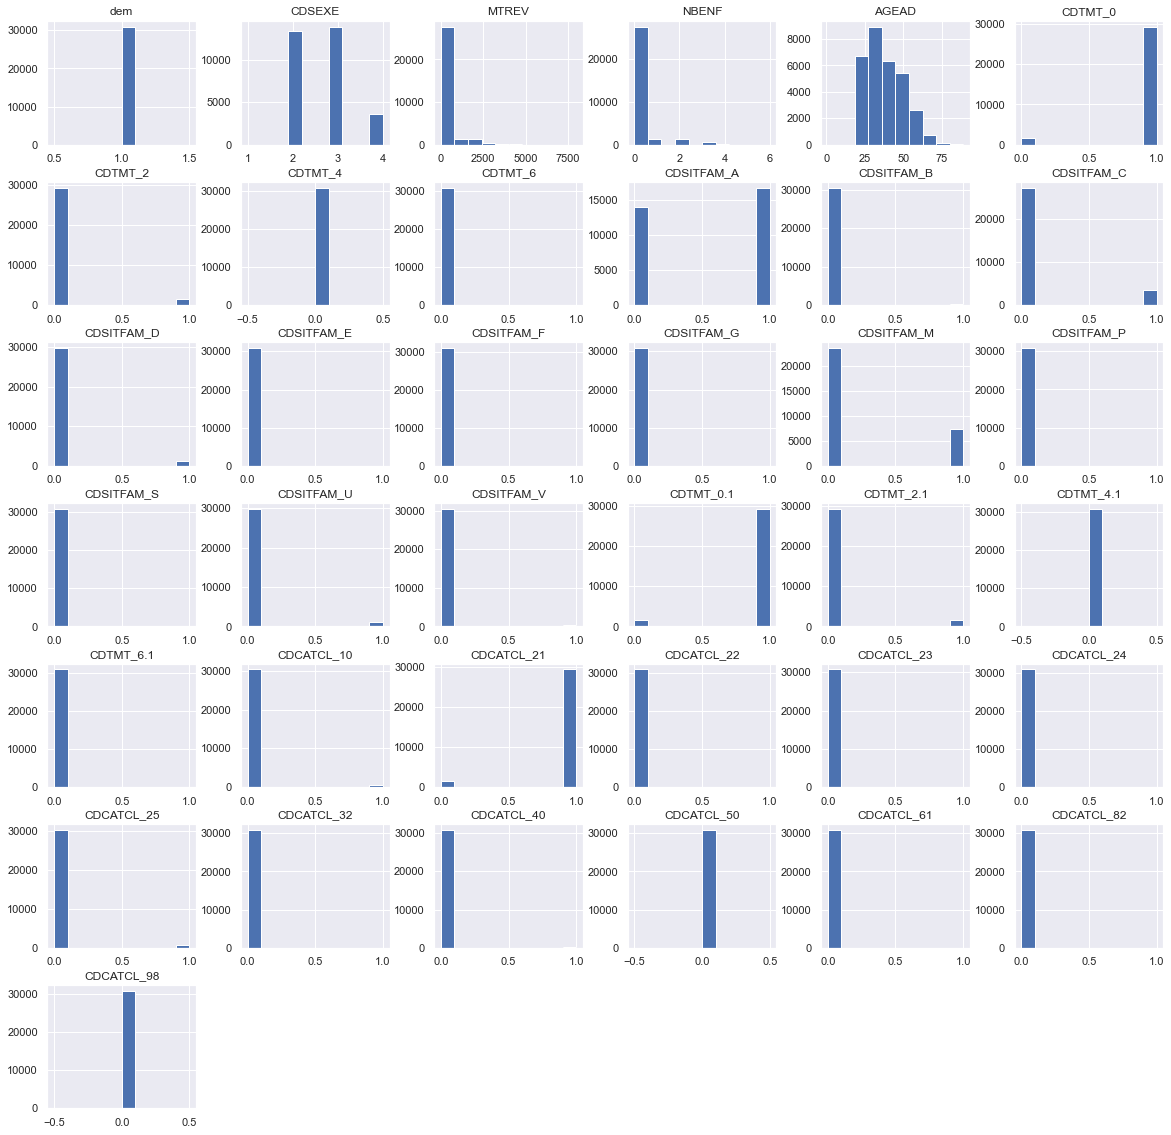

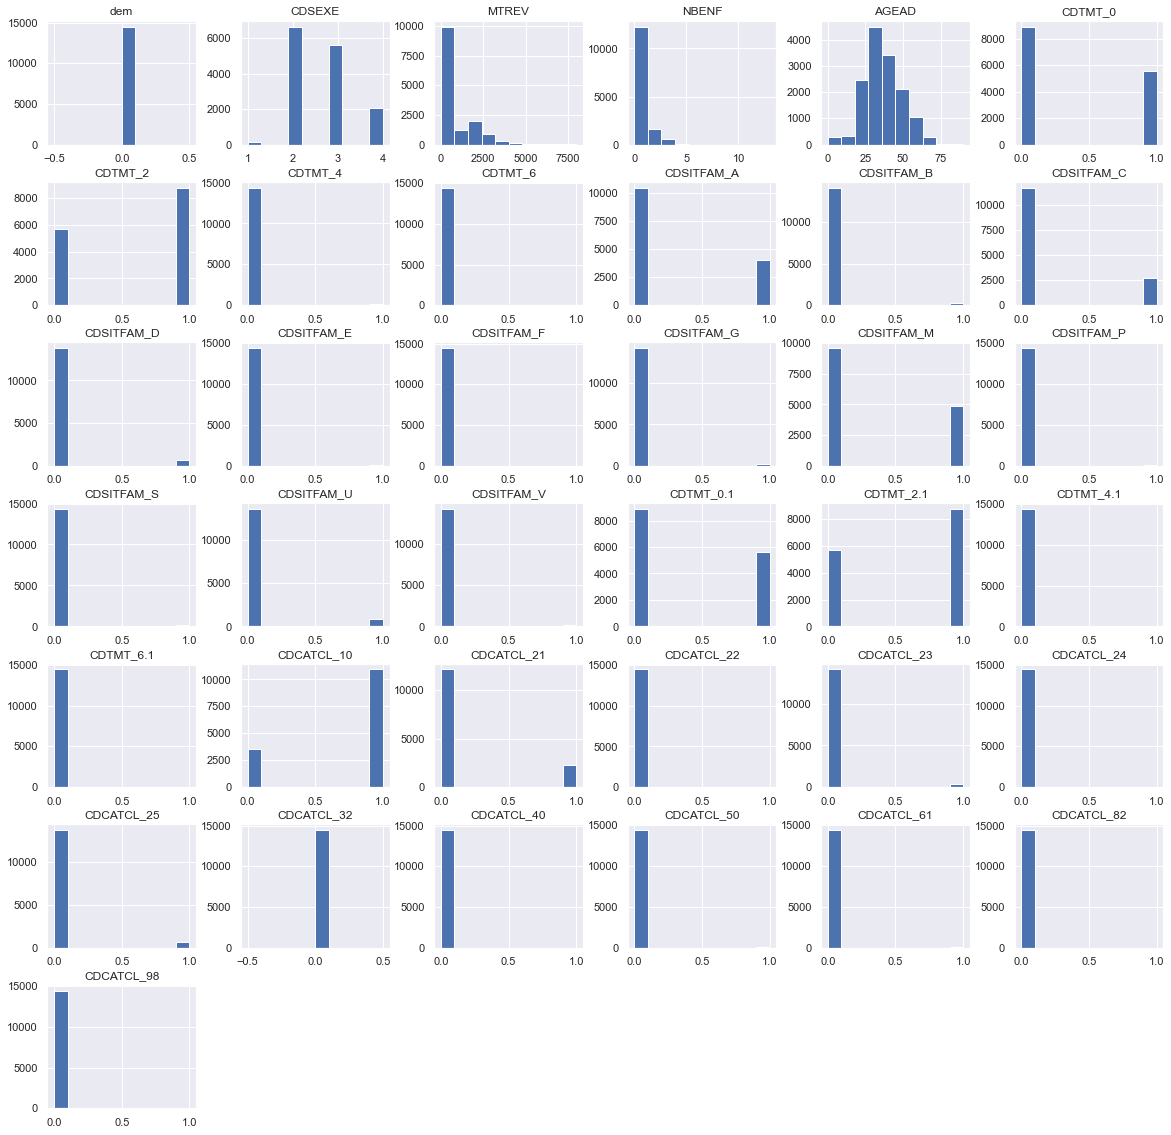

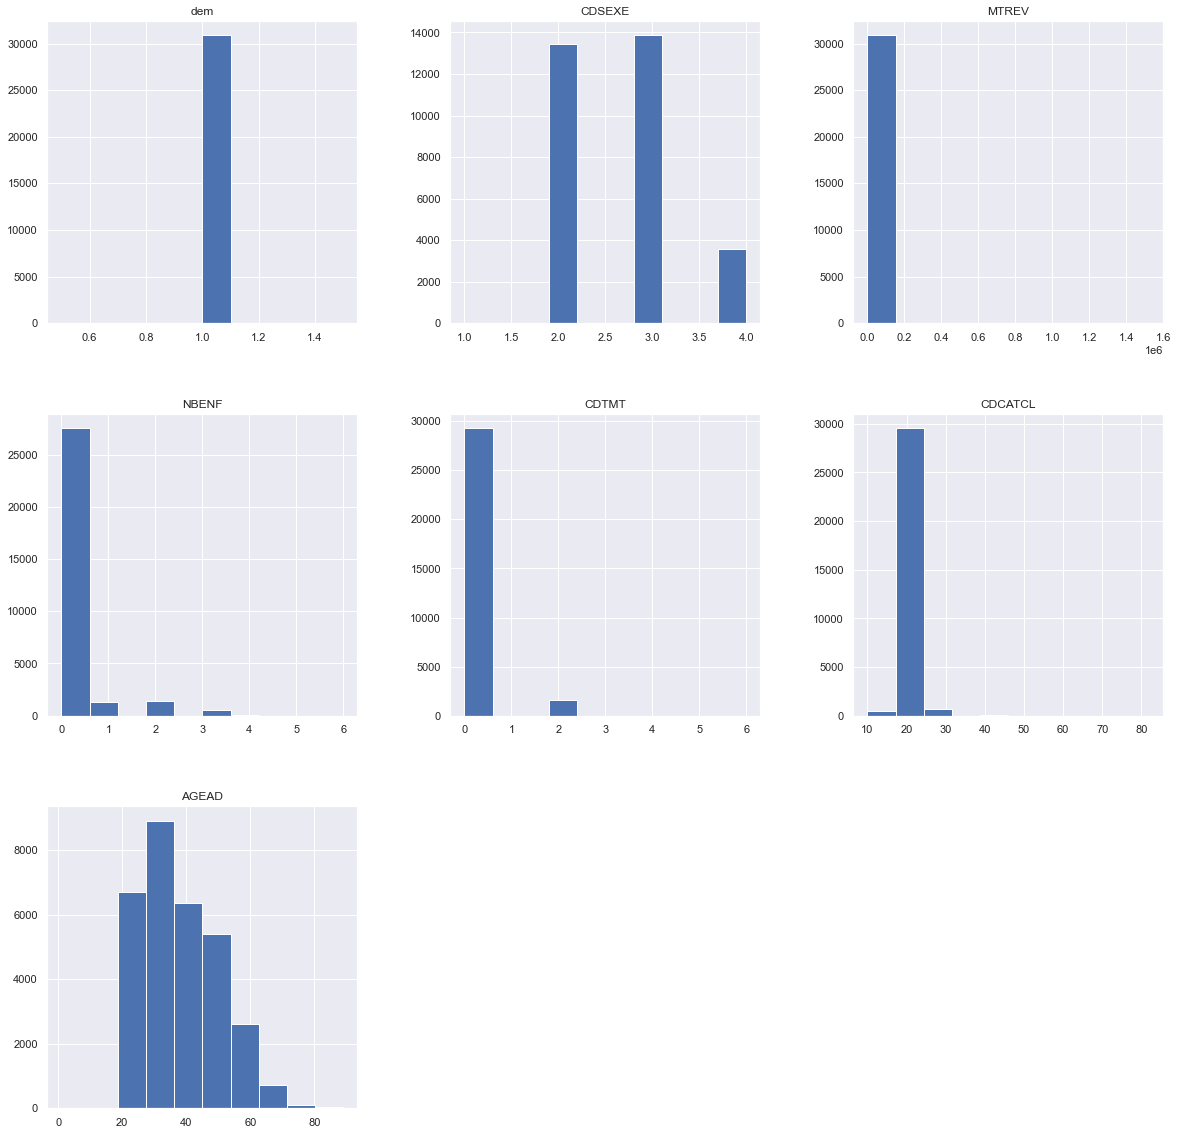

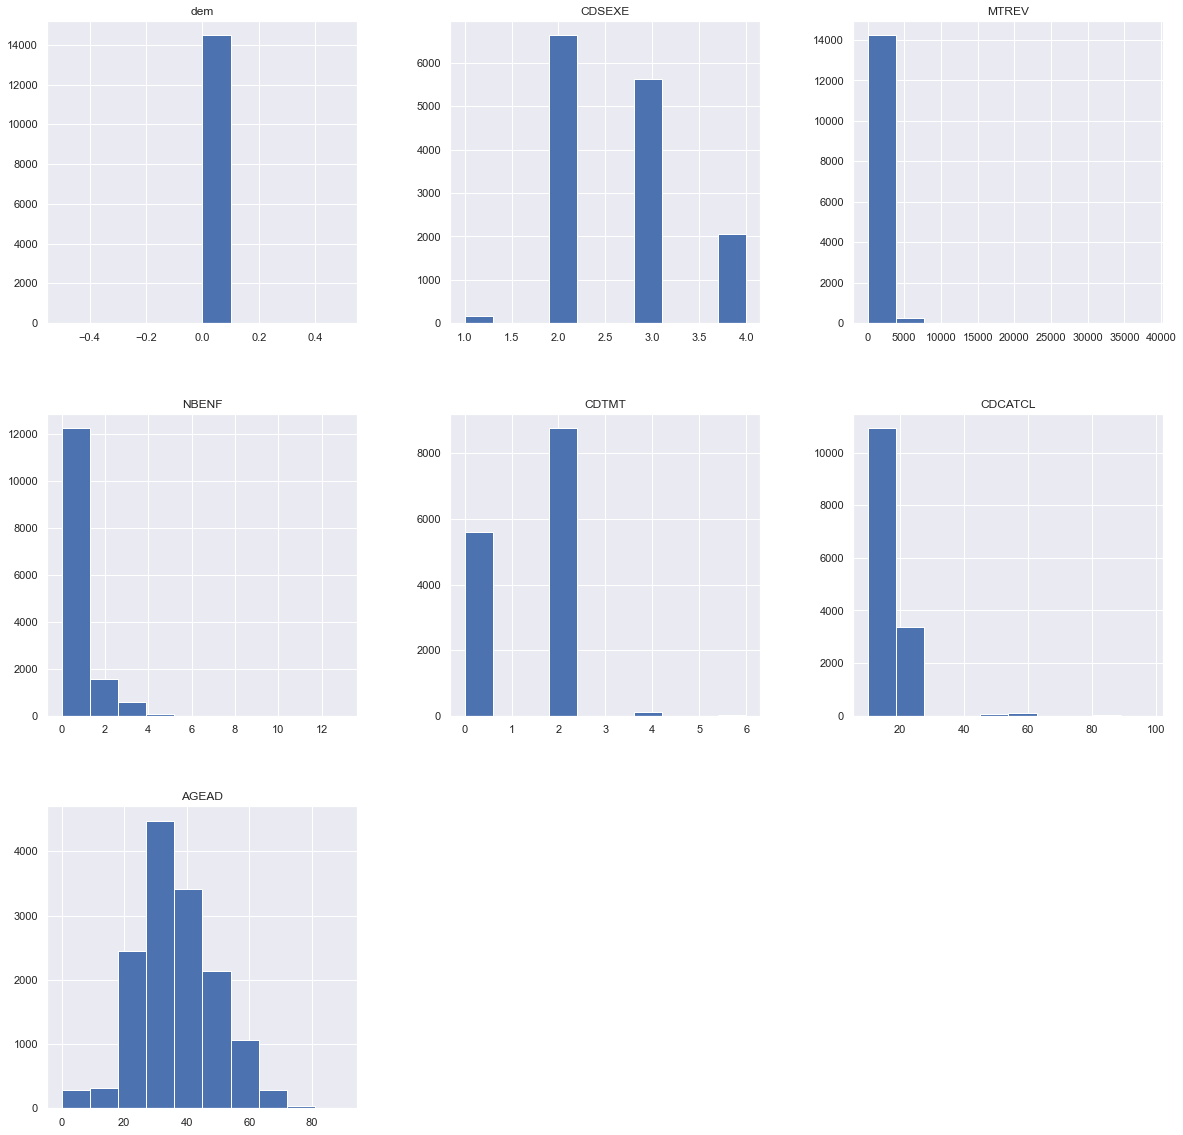

In [67]:
prev_df_dem = prev_df.loc[prev_df['dem'] == 1.0]
prev_nd_df_dem = prev_nd_df.loc[prev_nd_df['dem'] == 1.0]
prev_df_ndem = prev_df.loc[prev_df['dem'] == 0.0]
prev_nd_df_ndem = prev_nd_df.loc[prev_nd_df['dem'] == 0.0]

prev_nd_df_dem.hist(figsize=(20,20))
plt.show

prev_nd_df_ndem.hist(figsize=(20,20))
plt.show

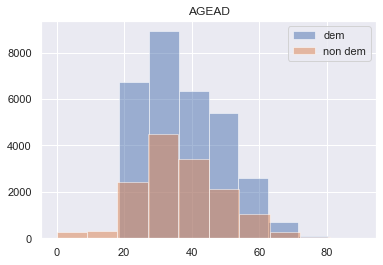

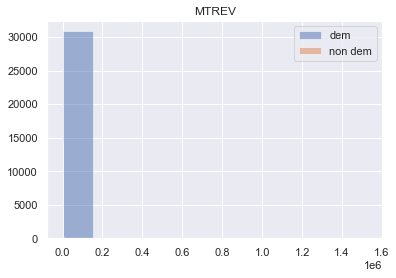

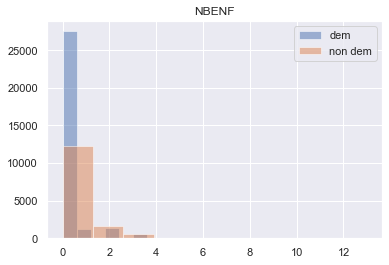

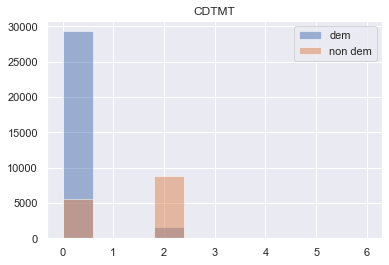

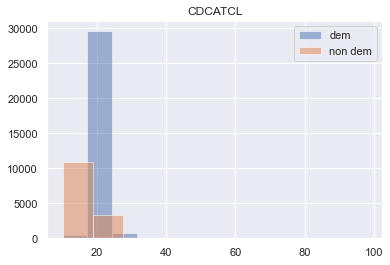

In [68]:
plt.hist(prev_nd_df_dem['AGEAD'], alpha=0.5, label='dem')
plt.hist(prev_nd_df_ndem['AGEAD'], alpha=0.5, label='non dem')
plt.legend(loc='upper right')
plt.title("AGEAD")
plt.show()

plt.hist(prev_nd_df_dem['MTREV'], alpha=0.5, label='dem')
plt.hist(prev_nd_df_ndem['MTREV'], alpha=0.5, label='non dem')
plt.legend(loc='upper right')
plt.title("MTREV")
plt.show()

plt.hist(prev_nd_df_dem['NBENF'], alpha=0.5, label='dem')
plt.hist(prev_nd_df_ndem['NBENF'], alpha=0.5, label='non dem')
plt.legend(loc='upper right')
plt.title("NBENF")
plt.show()

plt.hist(prev_nd_df_dem['CDTMT'], alpha=0.5, label='dem')
plt.hist(prev_nd_df_ndem['CDTMT'], alpha=0.5, label='non dem')
plt.legend(loc='upper right')
plt.title("CDTMT")
plt.show()

plt.hist(prev_nd_df_dem['CDCATCL'], alpha=0.5, label='dem')
plt.hist(prev_nd_df_ndem['CDCATCL'], alpha=0.5, label='non dem')
plt.legend(loc='upper right')
plt.title("CDCATCL")
plt.show()

In [ ]:
corrmatrix = prev_df.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmatrix, vmax =0.8, square = True)